In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
# Initialize the input vector and output vector for XOR
x=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,0]]) 

In [3]:
#Initialize the structure of  MLP with input ,hidden  and output layer
n_x = 2
n_y = 1
n_h = 2
m = x.shape[1]
lr = 0.1
np.random.seed(2)

In [5]:
# Weight matrix for hidden layer randomly
w1=np.random.rand(n_h, n_x)
w2=np.random.rand(n_y, n_h)


In [6]:
losses=[]
def sigmoid(z):
    z=1/(1+np.exp(-z))
    return z

In [7]:
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

In [8]:
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    dz2=a2-y
    dw2=np.dot(dz2,a1.T)/m
    dz1=np.dot(w2.T,dz2)*a1*(1-a1)
    dw1=np.dot(dz1,x.T)/m
    dw1=np.reshape(dw1,w1.shape)
    dw2=np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1

In [9]:
#Train the MLP
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2=forward_prop(w1,w2,x)
    loss= -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1=back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2=w2-lr*dw2
    w1=w1-lr*dw1

Text(0, 0.5, 'Loss value')

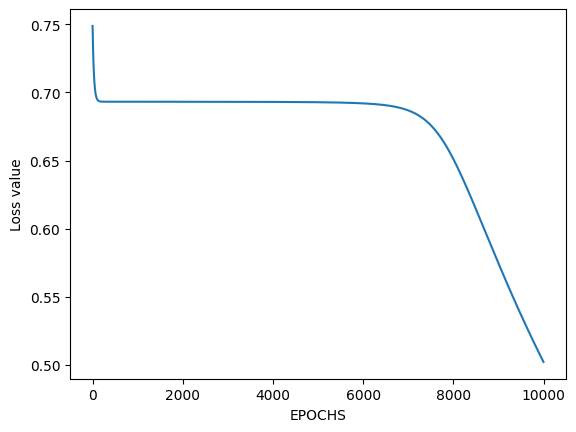

In [10]:
# plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [11]:
#Test the XOR classification
def predict(w1,w2,input):
    z1,a1,z2,a2=forward_prop(w1,w2,input)
    a2=np.squeeze(a2)
    if a2>=0.5:
        print([i[0] for i in input],1)
    else:
        print([i[0] for i in input],0)

In [13]:
print('Input','Output')
test=np.array([[1],[1]])
predict(w1,w2,test)
test=np.array([[1],[0]])
predict(w1,w2,test)
test=np.array([[0],[1]])
predict(w1,w2,test)
test=np.array([[0],[0]])
predict(w1,w2,test)

Input Output
[np.int64(1), np.int64(1)] 0
[np.int64(1), np.int64(0)] 1
[np.int64(0), np.int64(1)] 1
[np.int64(0), np.int64(0)] 0
